In [ ]:
#@Author: ANA CATARINA GOMES DA FONSECA PEREIRA 2020.3

import numpy as np
import math
import matplotlib as mplib
import random
import copy

In [ ]:
#PARAMETROS

TAM_POP = 20
N_BAIRROS = 10
PM = 0.15
GERACOES = 200
#TODO: parar de misturar ingles e portugues

In [ ]:
#REPRESENTACAO
bairros = {
    0: ['Aflitos', 50, 60], 
    1: ['Casa Amarela', 140, 78], 
    2: ['Casa Forte', 110, 55], 
    3: ['Campo Grande', 30, 108], 
    4: ['Boa Viagem', 240, 378], 
    5: ['Piedade', 400, 128], 
    6: ['Cidade Universitária', 330, 256], 
    7: ['Derby', 80, 15], 
    8: ['Encruzilhada', 30, 20], 
    9: ['Ibura', 280, 12]
}

In [ ]:
#METODOS BASICOS
def distancia(b1, b2):
  return math.sqrt((bairros[b2][1] - bairros[b1][1])**2 + ((bairros[b2][2] - bairros[b1][2])**2))


def print_ind(bairro):
  print(bairro[0], ' ')

def get_best(pop):
  best = 0
  for i in range(0, len(pop)):
    if fitness(pop[i]) > fitness(pop[best]):
      best = i
  return best

def fitness(rota):
  dist = 0
  n = 0
  while n < N_BAIRROS:
    if n == N_BAIRROS-1:
      dist += distancia(rota[n], rota[0])
    else:
      dist += distancia(rota[n], rota[n+1])
    n += 1
  return 1/dist

def plot_rota(rota, sel='' , cross='', mut=''):
  aux_x = []
  aux_y = []
  for i in rota:
    aux_x.append(bairros[i][1])
    aux_y.append(bairros[i][2])
    mplib.pyplot.plot(bairros[i][1], bairros[i][2], 'ro')
  aux_x.append(bairros[rota[0]][1])
  aux_y.append(bairros[rota[0]][2])
  mplib.pyplot.plot(aux_x, aux_y)
  mplib.pyplot.title(sel + ' - ' + cross + ' - ' + mut)
  mplib.pyplot.show()


def print_rota(rota):
  _rota = []
  for i in rota:
    _rota.append(bairros[i][0])
  print(_rota)

In [ ]:
#INICIALIZACAO DA POPULACAO
def inicializar_pop(tam_pop):
  pop = []
  for i in range(0, tam_pop):
    pop.append(random.sample([i for i in range(0, N_BAIRROS)], N_BAIRROS))
  return pop

In [ ]:
#METODOS DE SELECAO

def roulette(pop):
  prob_distr = []
  total_fitness = 0
  pais = []
  for i in range(0, TAM_POP):
    total_fitness += fitness(pop[i])
    prob_distr.append(total_fitness)
  prob_distr = [ i/total_fitness for i in prob_distr]
  for k in range(2):
    n = random.random()
    i = 0
    while prob_distr[i] < n:
      i += 1
    pais.append(pop[i])
  return pais

def tournament(pop):
  current_member = 1
  pool = random.choices(pop, k= int(N_BAIRROS/2))
  pais = []
  while current_member <= 2:
    best = get_best(pool)
    pais.append(pop[best])
    current_member += 1
  return pais

def elitism(pop):
  pais = []
  pop_copy = copy.deepcopy(pop)
  aux_best = []
  #Pego o melhor individuo d pop, removo ele da pop auxiliar e rodo de novo
  #até encher o aux_best com os 4 melhores individuos.
  for i in range(4):
    aux_ = get_best(pop_copy)
    aux_best.append(pop_copy[aux_])
    pop_copy.pop(aux_)
  #escolho um dos 4 melhores e coloco na lista de pais
  chosen_best = random.choice(aux_best)
  pais.append(chosen_best)
  #faco um torneio e escolho entre um dos pais pra ser o segundo pai
  aux = tournament(pop)
  n = random.random()
  if n < 0.5:
    pais.append(aux[0])
  else:
    pais.append(aux[1])
  return pais

selection_operator = {
    'roleta': roulette,
    'torneio': tournament,
    'elitismo': elitism
}


In [ ]:
#METODOS DE CROSSOVER

# metodo auxiliar q recebe uma 2 listas e um indice
# e coloca a 2 lista numa 3 lista na posicao idx
# e completa o resto faltante com os da 1 lista
# na ordem q aparecem nela.
def mount(individual, subst, idx):
  i = 0
  offspring = []
  while len(offspring) < idx:
    if individual[i] not in subst:
      offspring.append(individual[i])
    i += 1
  
  offspring = offspring + subst

  while len(offspring) < len(individual):
    if individual[i] not in offspring:
      offspring.append(individual[i])
    i += 1
  return offspring

#escolhe uma subrota aleatoria do parent1 e coloca ela na mesma posicao no filho. 
#vai sendo preenchido com os valores faltantes na ordem do parent2 - usa a funcao auxiliar acima p fzr isso
def ox_crossover(parent1, parent2):
  idx = random.randint(0, len(parent1) -1)
  size = random.randint(1, 4)
  subst = parent1[idx: (idx + size)]

  offspring = mount(parent2, subst, idx) 
  return offspring

#escolhe um ponto, e ate ele fica com o pai, depois completa com o parent2
def onepcross(parent1, parent2):
  p = random.randint(0, len(parent1)- 2)
  proto_child = parent1[0:p]
  i = 0
  while len(proto_child) < len(parent2):
    if parent2[i] not in proto_child:
      proto_child.append(parent2[i])
    i += 1
  return proto_child



crossover_operator = {
    'ox': ox_crossover,
    'onepcross': onepcross,
}


In [ ]:
#METODOS DE MUTACAO

#escolhe uma subrota e inverte ela
def inversion_mutation(individual):
  idx = random.randint(0, len(individual) -1)
  size = random.randint(2, 4)
  subst = individual[idx: (idx + size)]
  subst.reverse()
  offspring = mount(individual, subst, idx) 
  return offspring

#escolhe duas cidades em posicoes aleatorias e troca elas de posicao
def exchange_mutation(individual):
  pos1 = random.randint(0, len(individual)-1)
  pos2 = random.randint(0, len(individual) - 1)

  while pos1 == pos2:
    pos2 = random.randint(0, len(individual) - 1)
  aux = individual[pos1]
  individual[pos1] = individual[pos2]
  individual[pos2] = aux
  return individual

mutation_operator = {
    'inversion': inversion_mutation,
    'exchange': exchange_mutation
}

Para a combinação  roleta   ox   inversion  a média foi de:  0.0007561875023272207  o melhor fitness é:  1253.5756967676637  que é o indivíduo:
['Encruzilhada', 'Aflitos', 'Campo Grande', 'Boa Viagem', 'Cidade Universitária', 'Piedade', 'Ibura', 'Casa Forte', 'Casa Amarela', 'Derby']


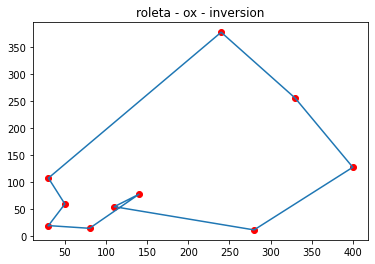

Para a combinação  roleta   ox   exchange  a média foi de:  0.0007631295154232598  o melhor fitness é:  1235.8329192910087  que é o indivíduo:
['Cidade Universitária', 'Piedade', 'Ibura', 'Casa Amarela', 'Casa Forte', 'Derby', 'Aflitos', 'Encruzilhada', 'Campo Grande', 'Boa Viagem']


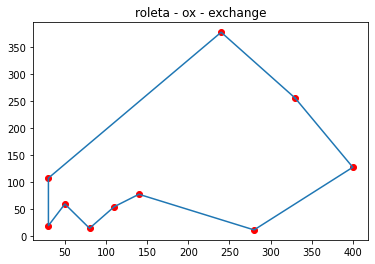

Para a combinação  roleta   onepcross   inversion  a média foi de:  0.0007280769537758825  o melhor fitness é:  1195.9990282646536  que é o indivíduo:
['Casa Amarela', 'Ibura', 'Piedade', 'Cidade Universitária', 'Boa Viagem', 'Campo Grande', 'Aflitos', 'Encruzilhada', 'Derby', 'Casa Forte']


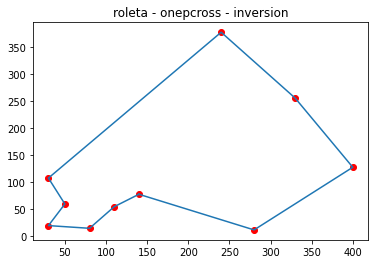

Para a combinação  roleta   onepcross   exchange  a média foi de:  0.0007434059082637631  o melhor fitness é:  1195.9990282646536  que é o indivíduo:
['Ibura', 'Casa Amarela', 'Casa Forte', 'Derby', 'Encruzilhada', 'Aflitos', 'Campo Grande', 'Boa Viagem', 'Cidade Universitária', 'Piedade']


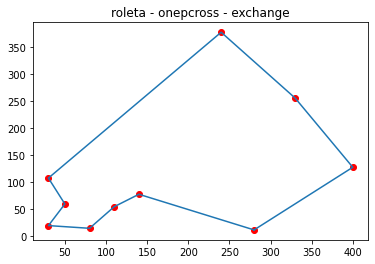

Para a combinação  torneio   ox   inversion  a média foi de:  0.0006520209272151043  o melhor fitness é:  1324.3188303499703  que é o indivíduo:
['Derby', 'Encruzilhada', 'Boa Viagem', 'Cidade Universitária', 'Piedade', 'Ibura', 'Casa Amarela', 'Casa Forte', 'Campo Grande', 'Aflitos']


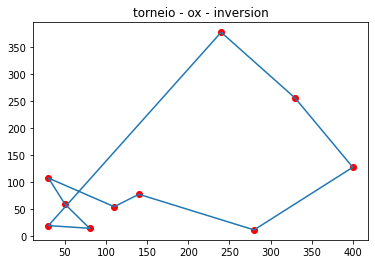

Para a combinação  torneio   ox   exchange  a média foi de:  0.0006972198039160677  o melhor fitness é:  1290.7429904401765  que é o indivíduo:
['Campo Grande', 'Boa Viagem', 'Cidade Universitária', 'Piedade', 'Ibura', 'Casa Amarela', 'Casa Forte', 'Encruzilhada', 'Aflitos', 'Derby']


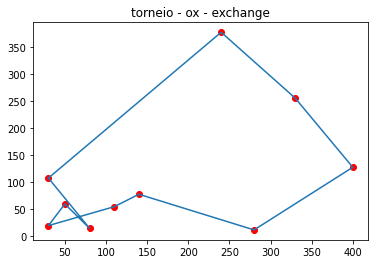

Para a combinação  torneio   onepcross   inversion  a média foi de:  0.0006342239576187397  o melhor fitness é:  1384.8777819283441  que é o indivíduo:
['Aflitos', 'Derby', 'Encruzilhada', 'Casa Forte', 'Casa Amarela', 'Campo Grande', 'Boa Viagem', 'Cidade Universitária', 'Piedade', 'Ibura']


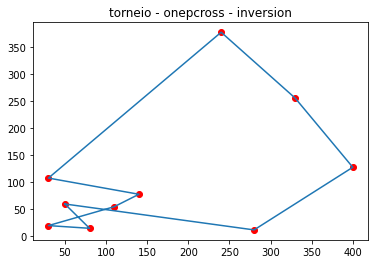

Para a combinação  torneio   onepcross   exchange  a média foi de:  0.0006852515711926209  o melhor fitness é:  1325.0245338479635  que é o indivíduo:
['Ibura', 'Casa Amarela', 'Campo Grande', 'Aflitos', 'Derby', 'Encruzilhada', 'Casa Forte', 'Boa Viagem', 'Cidade Universitária', 'Piedade']


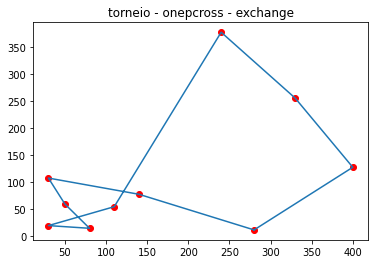

Para a combinação  elitismo   ox   inversion  a média foi de:  0.0007376732516409971  o melhor fitness é:  1195.9990282646534  que é o indivíduo:
['Piedade', 'Ibura', 'Casa Amarela', 'Casa Forte', 'Derby', 'Encruzilhada', 'Aflitos', 'Campo Grande', 'Boa Viagem', 'Cidade Universitária']


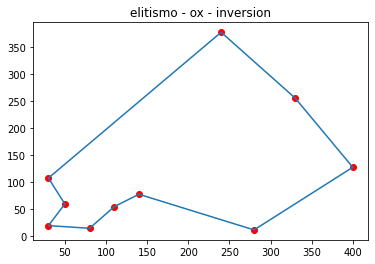

Para a combinação  elitismo   ox   exchange  a média foi de:  0.000741525152153453  o melhor fitness é:  1242.6821838294825  que é o indivíduo:
['Ibura', 'Casa Amarela', 'Casa Forte', 'Encruzilhada', 'Derby', 'Aflitos', 'Campo Grande', 'Boa Viagem', 'Cidade Universitária', 'Piedade']


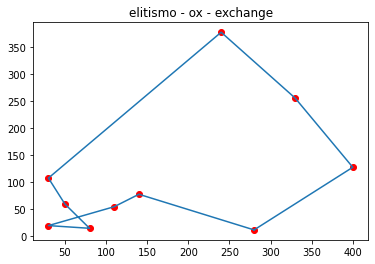

Para a combinação  elitismo   onepcross   inversion  a média foi de:  0.0007312440344186113  o melhor fitness é:  1278.3413782831346  que é o indivíduo:
['Aflitos', 'Encruzilhada', 'Derby', 'Casa Forte', 'Boa Viagem', 'Cidade Universitária', 'Piedade', 'Ibura', 'Casa Amarela', 'Campo Grande']


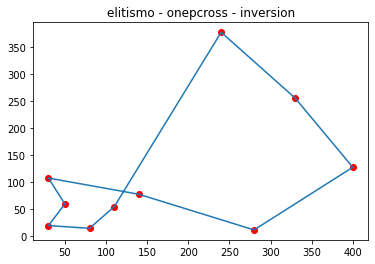

Para a combinação  elitismo   onepcross   exchange  a média foi de:  0.0007359183358695377  o melhor fitness é:  1235.832919291009  que é o indivíduo:
['Piedade', 'Cidade Universitária', 'Boa Viagem', 'Campo Grande', 'Encruzilhada', 'Aflitos', 'Derby', 'Casa Forte', 'Casa Amarela', 'Ibura']


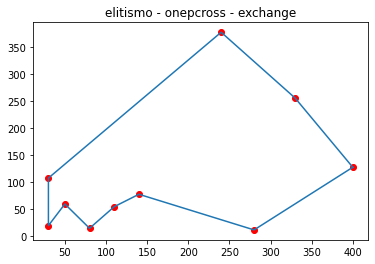


 1358.8464252877077   1235.832919291009 

[5, 6, 4, 3, 8, 0, 7, 2, 1, 9]
['elitismo', 'onepcross', 'exchange']


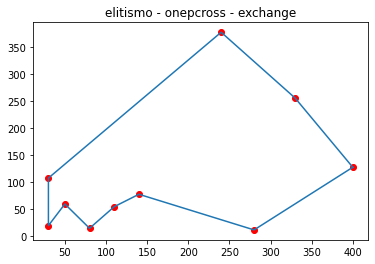

In [ ]:
#O GA Q RECEBE O TIPO DE CROSSOVER, SELECAO E MUTACAO Q VAI SER USADO
def ga(selection, crossover, mutation):
  pop = inicializar_pop(TAM_POP)
  melhor = pop[get_best(pop)]
  g = 0  
  while g < GERACOES:
    aux_pop = []
    while len(aux_pop) < TAM_POP:
      [parent1, parent2] = selection_operator[selection](pop)
      offspring = crossover_operator[crossover](parent1, parent2)
      n = random.random()
      if n < PM:
        offspring = mutation_operator[mutation](offspring)
      aux_pop.append(offspring)
    aux_melhor = aux_pop[get_best(aux_pop)]
    if fitness(melhor) < fitness(aux_melhor):
      melhor = aux_melhor
    g += 1
  return melhor

#FUNCAO DE TESTE, Q VAI TESTAR TODAS AS COMBINACOES DE SELECAO, CROSSOVER E MUTACAO
# E VAI RODAR N VEZES PRA CADA, TRAZENDO A MEDIA E O MELHOR
def teste(n):
  sel = ['roleta', 'torneio', 'elitismo']  
  cross = ['ox', 'onepcross']
  mut = ['inversion', 'exchange']
  best_combinacao = [-1, -1, -1]
  for i in sel:
    for j in cross:
      for k in mut:
        media = 0
        best_fitness = 0
        best_solution = []
        for z in range(n):
          solucao = ga(i, j, k)
          fit = fitness(solucao)
          media += fit
          if fit > best_fitness:
            best_fitness = fit 
            best_solution = solucao
            best_combinacao = [i, j, k]
        print('Para a combinação ', i, ' ', j, ' ', k, ' a média foi de: ', media/n, ' o melhor fitness é: ', 1/best_fitness, ' que é o indivíduo:')
        print_rota(best_solution)
        plot_rota(best_solution, i, j, k)
            
  media = media/n
  print('\n',1/media, ' ', 1/best_fitness, '\n')
  print(best_solution)
  print(best_combinacao)
  plot_rota(best_solution, best_combinacao[0], best_combinacao[1], best_combinacao[2])

teste(30)